In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
warnings.simplefilter(action='ignore', category=Warning)


In [53]:
df=pd.read_csv('data/Automobile.csv')
df.head

<bound method NDFrame.head of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible     

In [54]:
for col in df.columns:
    values = []
    
    # numerik olmayanlar -> kategorik
    if col not in df.describe().columns:
        for val in df[col].unique():
            values.append(val)
        
        print("{0} -> {1}".format(col, values))
        

CarName -> ['alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls', 'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5', 'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage', 'dodge challenger se', 'dodge d200', 'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom', 'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc', 'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl', 'honda accord', 'honda civic 1300', 'honda prelude', 'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ', 'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk', 'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4', 'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom l', 'mazda glc custom', 'buick electra 225 custom', 'buick century luxus (sw)'

In [55]:
df.CarName

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [56]:
manufacterer=df['CarName'].apply( lambda x : x.split(' ')[0] )
manufacterer


0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [57]:
data=df.copy()
data.drop(columns=['CarName'], axis=1, inplace=True)
data.insert(3, 'manufacterer',manufacterer )
data.groupby(by='manufacterer').count()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
manufacterer,,,,,,,,,,,,,,,,,,,,,
Nissan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
alfa-romero,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
audi,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
bmw,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
buick,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
chevrolet,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
dodge,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
honda,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
isuzu,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [58]:
data.manufacterer = data.manufacterer.str.lower()
data.manufacterer

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: manufacterer, Length: 205, dtype: object

In [59]:
data.replace({
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'vw',
    'volkswagen': 'vw'
}, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'manufacturer'

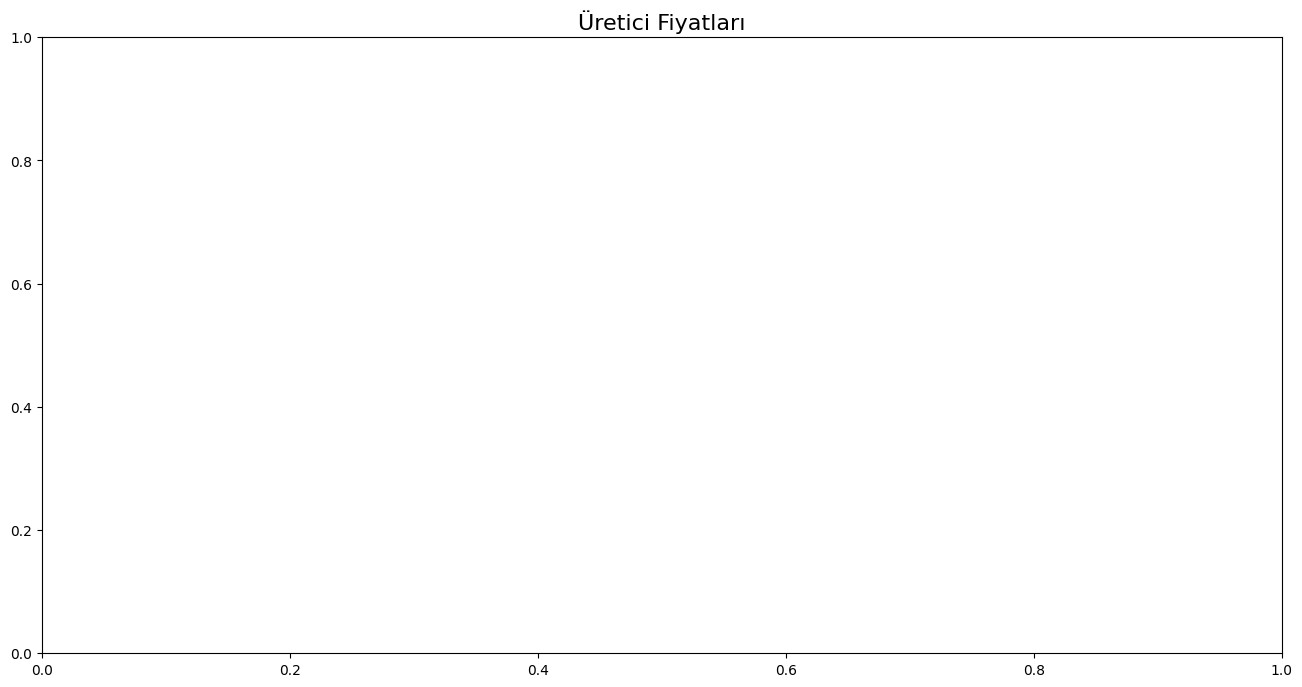

In [60]:
plt.figure(figsize=(16,8))
plt.title('Üretici Fiyatları', fontsize=16)
sns.barplot(x=data.manufacturer, y=data.price, 
            hue=data.fueltype, palette='Set2')
plt.xticks(rotation=1)
plt.tight_layout()

In [ ]:
data_new = data[[
        'car_ID', 'symboling', 'fueltype', 'manufacterer', 'aspiration',
        'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
        'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber',
        'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'price']]

In [ ]:
data.insert(10, 'Tork', 
        pd.Series(data.horsepower*5252 / data.peakrpm, index=data.index))

In [ ]:
data.Tork

0      116.594400
1      116.594400
2      161.761600
3       97.400727
4      109.814545
          ...    
200    110.875556
201    158.550943
202    127.957818
203    115.981667
204    110.875556
Name: Tork, Length: 205, dtype: float64

In [ ]:
data['fueleconomy'] = (0.55 * data.citympg) + (0.45 * data.highwaympg)

In [ ]:
data.drop(columns=['car_ID','manufacterer','doornumber','carheight',
                   'compressionratio', 'symboling','stroke','citympg',
                   'highwaympg', 'fuelsystem', 'peakrpm'], 
          axis=1, inplace=True)

In [ ]:
cars=data.copy()

In [ ]:
dummies_list = ['fueltype', 'aspiration', 'carbody','drivewheel',
                'enginelocation', 'enginetype', 'cylindernumber']

In [ ]:
for i in dummies_list:
    
    temp_df = pd.get_dummies(eval('cars' + '.' + i), drop_first=True)
    
    cars = pd.concat([cars, temp_df], axis=1)
    
    cars.drop([i], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
train_data, test_data = train_test_split(cars, train_size=0.7, random_state=42 )

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scale_cols = ['wheelbase', 'Tork','carlength','carwidth','curbweight',
              'enginesize', 'horsepower','fueleconomy','boreratio']

In [ ]:
train_data[scale_cols]=scaler.fit_transform(train_data[scale_cols])

In [ ]:
train_data.head()

,wheelbase,Tork,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
177,0.544828,0.266354,0.534483,0.447619,0.284379,0.203125,0.550000,0.169492,11248.0,0.530275,...,1,0,0,0,0,1,0,0,0,0
75,0.555172,0.581395,0.582759,0.590476,0.485536,0.273438,0.885714,0.521186,16503.0,0.236697,...,1,0,0,0,0,1,0,0,0,0
174,0.544828,0.129644,0.534483,0.447619,0.294170,0.156250,0.521429,0.088983,10698.0,0.607339,...,1,0,0,0,0,1,0,0,0,0
31,0.000000,0.044106,0.000000,0.200000,0.000000,0.085938,0.264286,0.101695,6855.0,0.710092,...,1,0,0,0,0,1,0,0,0,0
12,0.503448,0.424312,0.555172,0.285714,0.396529,0.367188,0.550000,0.292373,20970.0,0.343119,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
y_train=train_data.pop('price')

In [ ]:
X_train=train_data

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
rfe = RFE(lr, 10)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [ ]:
rfe = rfe.fit(X_train, y_train)

In [ ]:
X_train_rfe=X_train[X_train.columms[rfe.support_]]